In [83]:
from plot_lib import plot_data, plot_model, set_default

In [84]:
set_default()

# Feature choosing

In [51]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn import svm
from xgboost import XGBRegressor,plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,log_loss
import matplotlib.pyplot as plt

In [52]:
train = pd.read_csv('train_cleaning.csv')
label = pd.read_csv('label.csv')
test = pd.read_csv('test_cleaning.csv')

In [53]:
train_str = train.select_dtypes(include=['object'])
train_int = train.select_dtypes(exclude=['object'])
test_str  = test.select_dtypes (include =['object'])
test_int  = test.select_dtypes (exclude =['object'])

In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [55]:
for i in range(train_str.shape[1]):
    le.fit(train_str.iloc[:,i])
    train_str.iloc[:,i] = le.transform(train_str.iloc[:,i])

/home/yasser/anaconda3/envs/AMMI/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/yasser/anaconda3/envs/AMMI/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [56]:
train = pd.concat([train_int,train_str],axis=1)
label = pd.read_csv('label.csv')

In [57]:
for i in range(test_str.shape[1]):
    le.fit(test_str.iloc[:,i])
    test_str.iloc[:,i] = le.transform(test_str.iloc[:,i])

In [58]:
test = pd.concat([test_int,test_str],axis=1)

In [59]:
train.to_csv('train_set.csv',index=False)
test.to_csv('test_set.csv',index=False)

In [60]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn import svm
from xgboost import XGBRegressor,plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,log_loss
import matplotlib.pyplot as plt

In [91]:
train = pd.read_csv('train_set.csv')
label = pd.read_csv('label.csv')
test = pd.read_csv('test_set.csv')

In [92]:
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

## 1. Using Lasso to degenerate the parameters

In [93]:
sgd_l1 = SGDRegressor(max_iter=30, penalty="l1", random_state=1,alpha=1e-2)
sgd_l1.fit(train, label)

/home/yasser/anaconda3/envs/AMMI/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=30,
       n_iter=None, n_iter_no_change=5, penalty='l1', power_t=0.25,
       random_state=1, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [94]:
sgd_l1.coef_

array([-8.93306765e+12, -3.06630509e+12,  2.02631697e+12, -2.62824477e+11,
       -5.55504432e+12,  5.04004425e+12,  8.72154330e+09,  7.73096455e+10,
       -1.05383464e+12, -3.52832800e+12,  1.17209080e+11, -4.11115297e+09,
        4.51954060e+12,  8.70751097e+09, -1.68261746e+12, -6.96768878e+12,
       -8.11121240e+10, -1.57528419e+09, -4.35488595e+12,  3.28955859e+12,
        5.03168396e+12,  9.24833724e+11, -9.70099057e+12,  1.45102538e+13,
       -2.92022221e+11, -5.84565626e+12, -1.52275747e+11, -1.30402753e+11,
        2.77864679e+12,  1.91966024e+10, -3.47363128e+11, -1.56883471e+12,
       -2.78043153e+12, -3.15673797e+12, -1.75453444e+12,  2.64514188e+12,
       -5.52753721e+10, -3.74685442e+10, -7.19461944e+10, -1.57754404e+11,
       -1.92926076e+11, -2.66368611e+11,  2.52256406e+11, -5.31924199e+10,
       -1.82247272e+11, -3.73137997e+10, -4.58062624e+10, -1.11696110e+11,
        1.17335926e+11, -4.08371635e+11, -3.63097099e+11, -1.20512817e+11,
       -9.95183126e+10, -

In [95]:
sgd_l1.coef_.min(), sgd_l1.coef_.max()

(-9700990569838.328, 14510253752097.865)

In [96]:
good_feats = np.abs(np.array(sgd_l1.coef_)) > 1e+12 # lower bound alpha=1e-6

print("Features reduced from %10d to %10d" % (train.shape[1], int(good_feats.sum())))

Features reduced from         79 to         22


In [97]:
train_l1_select = train.loc[:, good_feats]
test_l1_select = test.loc[:, good_feats]

## 2. Using XGBooster to plot importance

In [98]:
model = XGBRegressor(max_depth=5,n_estimators=1000,learning_rate=1e-2)
model.fit(train,label)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [99]:
print(model.feature_importances_)

[0.07999649 0.03131442 0.0011403  0.01061357 0.05227841 0.00697338
 0.00978027 0.00320161 0.03381431 0.01157844 0.0099557  0.00605237
 0.05091882 0.00903469 0.02947239 0.07411955 0.00179817 0.00179817
 0.06561115 0.02521819 0.00122802 0.00214903 0.01749923 0.00078944
 0.02381475 0.02399018 0.03622648 0.02846366 0.0053945  0.01293803
 0.0053945  0.0405684  0.02070085 0.02534977 0.02403403 0.01083286
 0.00074558 0.         0.00175431 0.01460462 0.00631551 0.00135959
 0.00758739 0.00364019 0.01197316 0.00214903 0.000307   0.00166659
 0.00385948 0.01377133 0.00451735 0.00346476 0.00548222 0.0039472
 0.010482   0.00017543 0.00236832 0.0022806  0.00451735 0.00017543
 0.00333319 0.00412263 0.0073681  0.00390334 0.00109644 0.00640323
 0.00416648 0.01381518 0.00495592 0.         0.02482347 0.00135959
 0.         0.00048243 0.00346476 0.01653436 0.00298233 0.
 0.        ]


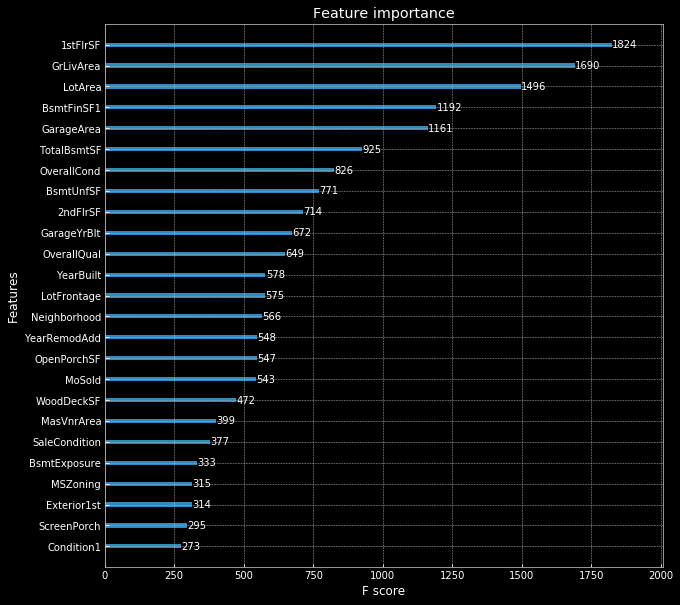

In [100]:
plot_importance(model,max_num_features=25)
plt.show()

In [101]:
good_feats_xgb = np.abs(np.array(model.feature_importances_)) > 1e-2
print("Features reduced from %10d to %10d" % (train.shape[1], int(good_feats_xgb.sum())))

Features reduced from         79 to         29


In [102]:
train_xgb_select = train.loc[:, good_feats_xgb]
test_xgb_select = test.loc[:, good_feats_xgb]

In [112]:
train_xgb_select.to_csv('train_29feautre.csv',index=False)
test_xgb_select.to_csv('test_29feautre.csv',index=False)

# Model training

### 1.lasso selection

In [103]:
x_train,x_val,y_train,y_val = train_test_split(train_l1_select,label,test_size = 0.3,random_state = 2)

In [104]:
model = XGBRegressor(max_depth=5,learning_rate=1e-2,n_estimators=1000)
model.fit(x_train,y_train,\
          eval_metric='rmse',\
          eval_set=[(x_val,y_val)],\
          early_stopping_rounds=200,\
          verbose=1)

[0]	validation_0-rmse:198746
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:196852
[2]	validation_0-rmse:194976
[3]	validation_0-rmse:193145
[4]	validation_0-rmse:191311
[5]	validation_0-rmse:189520
[6]	validation_0-rmse:187724
[7]	validation_0-rmse:185940
[8]	validation_0-rmse:184205
[9]	validation_0-rmse:182459
[10]	validation_0-rmse:180755
[11]	validation_0-rmse:179041
[12]	validation_0-rmse:177366
[13]	validation_0-rmse:175681
[14]	validation_0-rmse:174046
[15]	validation_0-rmse:172436
[16]	validation_0-rmse:170843
[17]	validation_0-rmse:169221
[18]	validation_0-rmse:167659
[19]	validation_0-rmse:166114
[20]	validation_0-rmse:164547
[21]	validation_0-rmse:163014
[22]	validation_0-rmse:161509
[23]	validation_0-rmse:160008
[24]	validation_0-rmse:158546
[25]	validation_0-rmse:157081
[26]	validation_0-rmse:155631
[27]	validation_0-rmse:154200
[28]	validation_0-rmse:152798
[29]	validation_0-rmse:151391
[30]	validation_0-rmse:150005
[31]	validatio

[262]	validation_0-rmse:43693.1
[263]	validation_0-rmse:43660.6
[264]	validation_0-rmse:43629.1
[265]	validation_0-rmse:43599.3
[266]	validation_0-rmse:43570
[267]	validation_0-rmse:43543.7
[268]	validation_0-rmse:43518.3
[269]	validation_0-rmse:43505.2
[270]	validation_0-rmse:43482.3
[271]	validation_0-rmse:43458.5
[272]	validation_0-rmse:43437.6
[273]	validation_0-rmse:43412.1
[274]	validation_0-rmse:43392.9
[275]	validation_0-rmse:43371.6
[276]	validation_0-rmse:43365.2
[277]	validation_0-rmse:43345.3
[278]	validation_0-rmse:43326.6
[279]	validation_0-rmse:43308.1
[280]	validation_0-rmse:43289.6
[281]	validation_0-rmse:43286.8
[282]	validation_0-rmse:43268.5
[283]	validation_0-rmse:43248.2
[284]	validation_0-rmse:43232.9
[285]	validation_0-rmse:43220.9
[286]	validation_0-rmse:43196.5
[287]	validation_0-rmse:43178.5
[288]	validation_0-rmse:43168.7
[289]	validation_0-rmse:43146.2
[290]	validation_0-rmse:43123.2
[291]	validation_0-rmse:43111
[292]	validation_0-rmse:43090.8
[293]	valida

[520]	validation_0-rmse:43791.6
[521]	validation_0-rmse:43796.5
[522]	validation_0-rmse:43799.8
[523]	validation_0-rmse:43799.9
[524]	validation_0-rmse:43801.7
[525]	validation_0-rmse:43805
[526]	validation_0-rmse:43807.3
[527]	validation_0-rmse:43809
[528]	validation_0-rmse:43812.9
[529]	validation_0-rmse:43813.2
[530]	validation_0-rmse:43816.1
[531]	validation_0-rmse:43817.6
[532]	validation_0-rmse:43820.5
[533]	validation_0-rmse:43820.4
[534]	validation_0-rmse:43824.7
[535]	validation_0-rmse:43825.8
[536]	validation_0-rmse:43827.6
[537]	validation_0-rmse:43830.8
[538]	validation_0-rmse:43833.1
[539]	validation_0-rmse:43834.7
[540]	validation_0-rmse:43837.1
[541]	validation_0-rmse:43840.2
[542]	validation_0-rmse:43842.5
[543]	validation_0-rmse:43848.8
[544]	validation_0-rmse:43852.5
[545]	validation_0-rmse:43853.7
Stopping. Best iteration:
[345]	validation_0-rmse:42790.6



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [105]:
pred = model.predict(test_l1_select)
submission = pd.read_csv('sample_submission.csv')
submission.SalePrice = pred
submission.to_csv('submission_l1_select.csv',index=False)

### 2. xgb selection

In [106]:
x_train,x_val,y_train,y_val = train_test_split(train_xgb_select,label,test_size = 0.3,random_state = 3)

In [107]:
model = XGBRegressor(max_depth=5,learning_rate=1e-2,n_estimators=1000)
model.fit(x_train,y_train,\
          eval_metric='rmse',\
          eval_set=[(x_val,y_val)],\
          early_stopping_rounds=200,\
          verbose=2)

[0]	validation_0-rmse:191543
Will train until validation_0-rmse hasn't improved in 200 rounds.
[2]	validation_0-rmse:187900
[4]	validation_0-rmse:184328
[6]	validation_0-rmse:180811
[8]	validation_0-rmse:177393
[10]	validation_0-rmse:174023
[12]	validation_0-rmse:170737
[14]	validation_0-rmse:167499
[16]	validation_0-rmse:164319
[18]	validation_0-rmse:161213
[20]	validation_0-rmse:158157
[22]	validation_0-rmse:155193
[24]	validation_0-rmse:152251
[26]	validation_0-rmse:149424
[28]	validation_0-rmse:146627
[30]	validation_0-rmse:143917
[32]	validation_0-rmse:141255
[34]	validation_0-rmse:138625
[36]	validation_0-rmse:136068
[38]	validation_0-rmse:133564
[40]	validation_0-rmse:131097
[42]	validation_0-rmse:128672
[44]	validation_0-rmse:126307
[46]	validation_0-rmse:123947
[48]	validation_0-rmse:121683
[50]	validation_0-rmse:119465
[52]	validation_0-rmse:117334
[54]	validation_0-rmse:115220
[56]	validation_0-rmse:113176
[58]	validation_0-rmse:111170
[60]	validation_0-rmse:109178
[62]	vali

[516]	validation_0-rmse:23710.2
[518]	validation_0-rmse:23708.9
[520]	validation_0-rmse:23703
[522]	validation_0-rmse:23693.1
[524]	validation_0-rmse:23691.9
[526]	validation_0-rmse:23685.1
[528]	validation_0-rmse:23677.8
[530]	validation_0-rmse:23673
[532]	validation_0-rmse:23658.8
[534]	validation_0-rmse:23652.2
[536]	validation_0-rmse:23642.2
[538]	validation_0-rmse:23641.9
[540]	validation_0-rmse:23625.2
[542]	validation_0-rmse:23626.7
[544]	validation_0-rmse:23618.8
[546]	validation_0-rmse:23620.6
[548]	validation_0-rmse:23617.6
[550]	validation_0-rmse:23601.9
[552]	validation_0-rmse:23595.8
[554]	validation_0-rmse:23593.9
[556]	validation_0-rmse:23591.3
[558]	validation_0-rmse:23587.9
[560]	validation_0-rmse:23581.4
[562]	validation_0-rmse:23574.4
[564]	validation_0-rmse:23574.3
[566]	validation_0-rmse:23569.2
[568]	validation_0-rmse:23558.3
[570]	validation_0-rmse:23554.5
[572]	validation_0-rmse:23550.1
[574]	validation_0-rmse:23539.2
[576]	validation_0-rmse:23533.8
[578]	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [108]:
pred = model.predict(test_xgb_select)
submission = pd.read_csv('sample_submission.csv')
submission.SalePrice = pred
submission.to_csv('submission_xgb_select.csv',index=False)

### Ensemble

In [109]:
pred1 = pd.read_csv('submission_xgb_select.csv')
pred2 = pd.read_csv('submission_l1_select.csv')

In [110]:
pred = 0.7*pred1.SalePrice.values + 0.3*pred2.SalePrice.values

In [111]:
submission = pd.read_csv('sample_submission.csv')
submission.SalePrice = pred
submission.to_csv('submission_ensemble.csv',index=False)